Importing the Dependencies 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
class SVM_classifier():


  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  
  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape

    # initiating the weight value and bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  # function for updating the weight and bias value
  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)



    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw

      self.b = self.b - self.learning_rate * db



  # predict the label for a given input value
  def predict(self, X):

    output = np.dot(X, self.w) - self.b
    
    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat

 Data Collection And Analysis

In [3]:
#loading the diabetes dataset to pandas dataframe
diabetes_dataset=pd.read_csv('diabetes.csv')

In [4]:
1 pd.read_csv?


Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    prefix: 'str | lib.NoDefault' = <no_default>,
    mangle_dupe_cols: 'bool' = True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates=None,
    infer

In [5]:
#PRINTING THE FIRST FIVE ROWS OF DIABETES DATASET
diabetes_dataset.head()

,Acetone,Temperature,Height,Weight,Age,BMI,Outcome
0,16.87,97.8,1.64,55.1,24,22.4,0
1,13.95,98.1,1.74,69.1,26,28.5,0
2,31.54,98.8,1.74,88.6,52,30.1,1
3,20.81,97.8,1.60,64.0,23,22.9,0
4,13.02,98.2,1.60,60.8,24,24.2,0


In [6]:
# No of Rows and Columns in the Dataset
diabetes_dataset.shape

(5000, 7)

In [7]:
#Getting the Statistcal Measures of the dataset
diabetes_dataset.describe()

,Acetone,Temperature,Height,Weight,Age,BMI,Outcome
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,26.624216,98.465840,1.683978,78.135780,39.201000,27.769480,0.504400
std,14.040280,0.492984,0.072369,14.145526,14.177729,3.102577,0.500031
min,0.500000,97.600000,1.600000,53.300000,23.000000,19.900000,0.000000
25%,13.530000,98.000000,1.620000,62.875000,24.000000,24.800000,0.000000
50%,31.475000,98.300000,1.650000,85.700000,43.000000,28.500000,1.000000
75%,39.620000,99.000000,1.760000,89.900000,53.000000,29.500000,1.000000
max,45.600000,99.100000,1.830000,95.600000,67.000000,32.200000,1.000000


In [8]:
diabetes_dataset['Outcome'].value_counts()

1    2522
0    2478
Name: Outcome, dtype: int64

0--> Non - Diabetic People

1--> Diabetic People


In [9]:
diabetes_dataset.groupby('Outcome').mean()

,Acetone,Temperature,Height,Weight,Age,BMI
Outcome,,,,,,
0,13.631759,98.018362,1.644310,66.671469,25.424132,26.134988
1,39.390000,98.905511,1.722954,89.400079,52.737510,29.375456


In [10]:
#Separating data and labels
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']

In [11]:
print(X)

      Acetone   Temperature  Height  Weight  Age   BMI
0        16.87         97.8    1.64    55.1   24  22.4
1        13.95         98.1    1.74    69.1   26  28.5
2        31.54         98.8    1.74    88.6   52  30.1
3        20.81         97.8    1.60    64.0   23  22.9
4        13.02         98.2    1.60    60.8   24  24.2
...        ...          ...     ...     ...  ...   ...
4995     13.32         98.1    1.60    67.6   25  28.9
4996     36.26         99.0    1.69    95.6   47  29.0
4997     37.69         99.0    1.68    91.0   53  29.3
4998     21.59         98.2    1.65    85.6   26  29.2
4999      5.06         97.9    1.73    66.1   24  27.9

[5000 rows x 6 columns]


In [12]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
4995    0
4996    1
4997    1
4998    0
4999    0
Name: Outcome, Length: 5000, dtype: int64


DATA STANDARDIZATION

In [13]:
scaler=StandardScaler()

In [14]:
scaler.fit(X)

StandardScaler()

In [15]:
standarized_data=scaler.transform(X)

In [16]:
print(standarized_data)

[[-0.69480037 -1.35076583 -0.60775593 -1.62864805 -1.07228177 -1.73082495]
 [-0.90279423 -0.74216654  0.77419853 -0.63883686 -0.93120134  0.23547946]
 [ 0.35015511  0.67789846  0.77419853  0.73982871  0.90284418  0.75123143]
 ...
 [ 0.78822437  1.08363131 -0.05497415  0.90951063  0.97338439  0.49335545]
 [-0.35859111 -0.53930011 -0.46956049  0.52772632 -0.93120134  0.46112095]
 [-1.53603583 -1.1478994   0.63600308 -0.85093926 -1.07228177  0.04207247]]


In [17]:
X=standarized_data
Y=diabetes_dataset['Outcome']

In [18]:
 print(X)
 print(Y)

[[-0.69480037 -1.35076583 -0.60775593 -1.62864805 -1.07228177 -1.73082495]
 [-0.90279423 -0.74216654  0.77419853 -0.63883686 -0.93120134  0.23547946]
 [ 0.35015511  0.67789846  0.77419853  0.73982871  0.90284418  0.75123143]
 ...
 [ 0.78822437  1.08363131 -0.05497415  0.90951063  0.97338439  0.49335545]
 [-0.35859111 -0.53930011 -0.46956049  0.52772632 -0.93120134  0.46112095]
 [-1.53603583 -1.1478994   0.63600308 -0.85093926 -1.07228177  0.04207247]]
0       0
1       0
2       1
3       0
4       0
       ..
4995    0
4996    1
4997    1
4998    0
4999    0
Name: Outcome, Length: 5000, dtype: int64


Splitting the data


In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y , test_size=0.2,stratify=Y,random_state=2)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(5000, 6) (4000, 6) (1000, 6)


Training the model


In [21]:
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter = 0.01)

In [22]:
#Training the Support Vector Machine Classifier
classifier.fit(X_train,Y_train)

Model Evaluation


Accuracy Score


In [23]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [24]:
print('Accuracy Score of the training data = ',round(training_data_accuracy*100, 2) ,"%")

Accuracy Score of the training data =  99.88 %


In [25]:
#accuracy score on the test data
X_test_prediction=classifier.predict(X_test)
X_test_accuracy=accuracy_score(X_test_prediction,Y_test)


In [26]:
print('Accuracy Score of the test data = ', round(X_test_accuracy*100, 2) ,"%")

Accuracy Score of the test data =  99.9 %


Confusion Matrix

In [27]:
cf_matrix = confusion_matrix(Y_test,X_test_prediction)


In [28]:
import seaborn as sns

<AxesSubplot: >

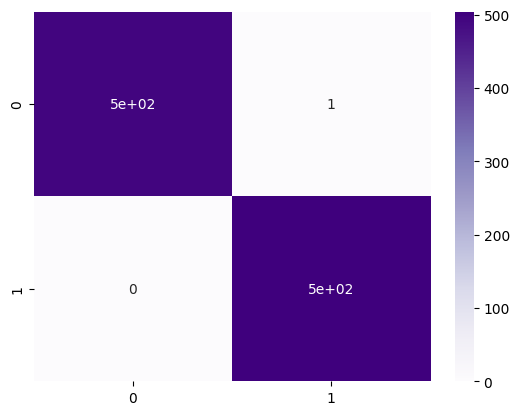

In [29]:
sns.heatmap(cf_matrix,annot=True,cmap='Purples')

INPUT 

AND

FINAL RESULT

In [30]:

input_data=(16.87,97.8,1.64,55.1,24,22.4)

#Changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if(prediction[0] == 0):
  print('The person is not affected with diabetes') 
else:
    print('The person is affected with diabetes')


[[-0.69480037 -1.35076583 -0.60775593 -1.62864805 -1.07228177 -1.73082495]]
[0]
The person is not affected with diabetes


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
